<a href="https://colab.research.google.com/github/CoderAD4/ML_task_ADG/blob/ML_ADG/ADG_ML_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction to dataset: 
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Missing data of respective fields: 
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Shape of the dataset: 
(1000, 7)

Summary of dataset: 
               age         bmi     children       charges
count  1000.000000  1000.00000  1000.000000   1000.000000
mean     39.615000    30.86338     1.080000  13075.755883
std      14.153908     6.04744     1.198765  11985.924552
min      18.000000    15.96000     0.000000   1121.873900
25%      27.000000    26.60000     0.000000   4719.683425
50%      40.000000    30.59000     1.0

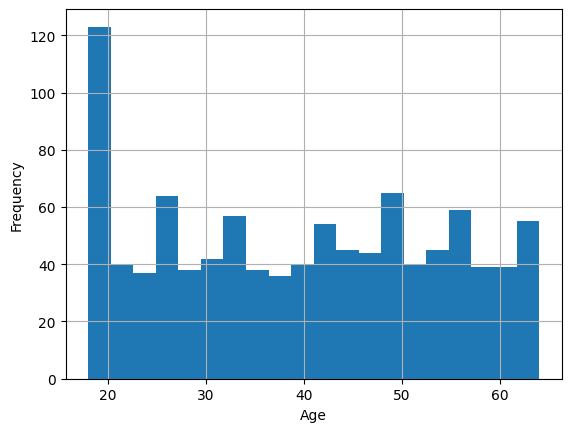


Index(['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')
Linear regression coefficients: 
                  Coefficient
age               3736.750471
bmi               1951.690666
children           432.647999
sex_male          -259.309503
smoker_yes        9303.698043
region_northwest  -190.225780
region_southeast  -527.167820
region_southwest  -514.142793

Permutation Importance of Features:
            Feature  Importance
4        smoker_yes    1.184274
0               age    0.172472
1               bmi    0.054219
6  region_southeast    0.003935
2          children    0.002675
7  region_southwest    0.002374
5  region_northwest    0.000421
3          sex_male   -0.001860

Results:

Maximum Losses Incurred by trained machine on test values:  5419.891611800572

Mean Absolute Error (MAE):  3662.738734542419

Cross-validated R-squared:  [0.77464238 0.72595853 0.69317804 0.79434315 0.76926862]


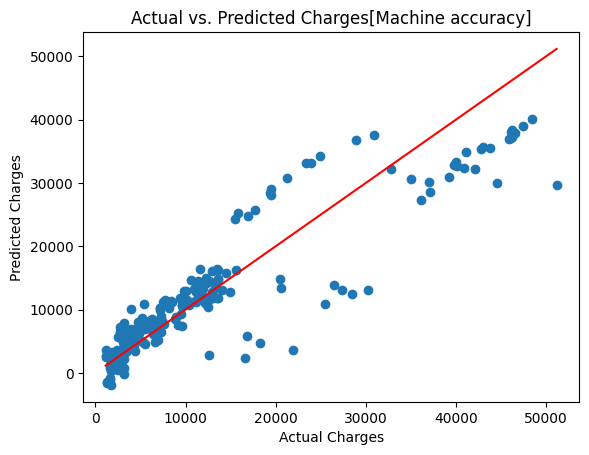

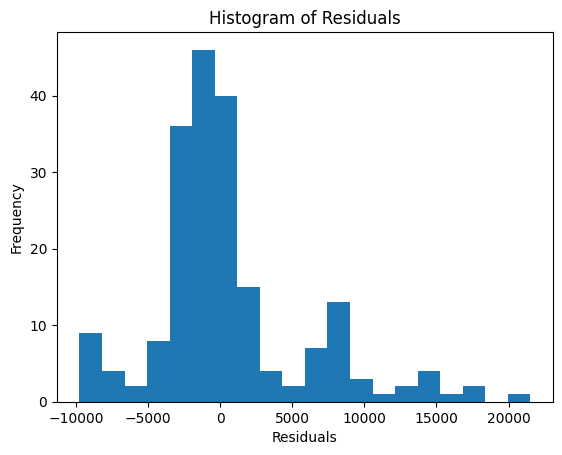

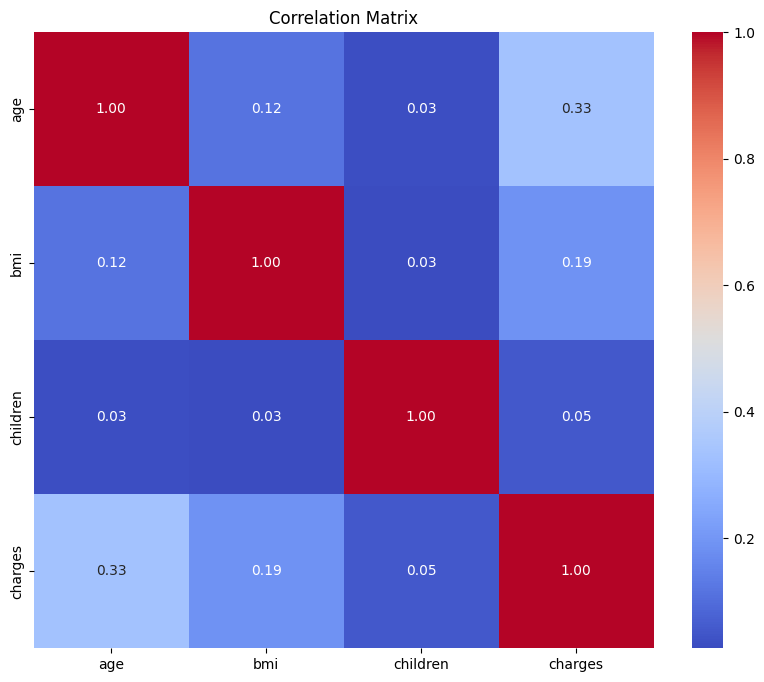

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.inspection import permutation_importance

#Loading data
google_drive_link = "https://drive.google.com/file/d/1hczD_xlMIzTDUOqHBGtuYdE4SwhabRtF/view?usp=sharing"
file_id = google_drive_link.split('/')[5]
download_url = f"https://drive.google.com/uc?export=download&id={file_id}"
df = pd.read_csv(download_url)
print("Introduction to dataset: ")
print(df.head())
print()
#Summary of dataset
print("Missing data of respective fields: ")
print(df.isnull().sum())
print()
print("Shape of the dataset: ")
print(df.shape)
print()
print("Summary of dataset: ")
print(df.describe())
print()
print("Age categories of people in the dataset: ")
df.age.hist(bins=20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()
print()

dfclass = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)
X = dfclass.drop('charges', axis=1)
y = dfclass['charges']

# Split the data into training and testing sets
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=46)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_eval_scaled = scaler.transform(X_eval)

# Linear Regression model
model = linear_model.LinearRegression()
model.fit(X_train_scaled, y_train)

# Charges on the test data
y_pred = model.predict(X_eval_scaled)

# Root Mean Squared Error (RMSE)
mean_error = mean_squared_error(y_eval, y_pred)
root_error = np.sqrt(mean_error)


# R-squared: Accuracy calculation
sq_error = r2_score(y_eval, y_pred)

# Coefficients a1,a2...an of linear regression model line
print(X.columns)
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("Linear regression coefficients: ")
print(coefficients)

# Permutation Importance
perm_importance = permutation_importance(model, X_eval_scaled, y_eval)
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

print("\nPermutation Importance of Features:")
print(importance_df)

#RESULTS
print()
print("Results:")
print()
print("Maximum Losses Incurred by trained machine on test values: ", root_error)
print()
mae = mean_absolute_error(y_eval, y_pred)
print("Mean Absolute Error (MAE): ", mae)
print()
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-validated R-squared: ", scores)
print("Mean R-squared: ", np.mean(scores))
print("Accuracy(in %): ",(sq_error*100))
print("Standard Deviation of R-squared: ", np.std(scores))
print()

# Scatter Plot of Actual vs. Predicted Charges
x = np.linspace(y_eval.min(), y_eval.max(), 100)
y = x
plt.scatter(y_eval, y_pred)
plt.plot(x, y, color="red")
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted Charges[Machine accuracy]')
plt.show()
print()

# Histogram of Residuals
residuals = y_eval - y_pred
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()
print()

#Correlation Matrix
plt.figure(figsize=(10, 8))
numerical_df = df.select_dtypes(include=['float', 'int'])
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
